<a href="https://colab.research.google.com/github/Moshulika/Facultate/blob/main/laborator/CV%203%20-%20Lab%20%232.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementarea perceptronului
Să se implementeze o variantă simplă a perceptronului, care modelează funcțiile logice uzuale.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [36]:
input = np.array([(0,0), (0,1), (1,0), (1,1)])
# TODO: Testati diferite functii logice pentru a vedea care dintre ele poate fi implementata cu un singur perceptron: OR, AND, XOR.
# Diferenta intre ele consta in schimbarea etichetelor conform tabelei logice.
labels = np.array([0, 1, 1, 1]) # OR

# TODO: Testati moduri diferite de a initializa ponderile: 0 vs aleator
w = np.array([0.0, 0.0, 0.0])

In [21]:
def form_x(x):
  return np.concatenate(([1], x))

In [22]:
def heaviside(x):
  if x < 0: return 0
  else: return 1
  # TODO: implementati functia prag Heaviside

In [23]:
def forward(x, w):
  # TODO: implementati activarea perceptronului
  z = w[0] + np.dot(w[0:], x) #produs scalar
  return heaviside(z)

In [37]:
num_epochs = 100
# TODO: Testati algoritmul cu diferite valori pentru lr: 0.01, 0.1, 0.5, 1:
lr = 0.01

for epoch in range(1, num_epochs+1):
  print("Epoca #{}".format(epoch))
  # Retinem valoarea ponderilor de la inceputul epocii
  w_epoch_start = w.copy()
  w_changed = False
  for i, (input_pair, label) in enumerate(zip(input, labels)):

    # Adaugam x0=1 la vectorul de intrare
    in_values = form_x(input_pair)

    # Calculam activarea perceptronului
    out_value = forward(in_values, w)
    # Actualizam valorile ponderilor
    # TODO

    error = label - out_value;
    w += lr * error * in_values

    # Retinem daca a avut loc modificare ponderilor <-> daca algoritmul inca mai invata
    if not (np.array_equal(w, w_epoch_start)):
      w_changed = True
    # Afisam pe ecran valorile conform tabelului din curs, modulul M2, slide 43
    print(in_values, label, out_value, label-out_value, w)
  # Daca valorile w nu se schimba pe parcursul unei epoci atunci putem incheia algoritmul
  if not w_changed:
    print("Nu a fost detectata nicio schimbare a ponderilor la epoca #{}. Algoritmul se poate incheia".format(epoch))
    break

Epoca #1
[1 0 0] 0 1 -1 [-0.01  0.    0.  ]
[1 0 1] 1 0 1 [0.   0.   0.01]
[1 1 0] 1 1 0 [0.   0.   0.01]
[1 1 1] 1 1 0 [0.   0.   0.01]
Epoca #2
[1 0 0] 0 1 -1 [-0.01  0.    0.01]
[1 0 1] 1 0 1 [0.   0.   0.02]
[1 1 0] 1 1 0 [0.   0.   0.02]
[1 1 1] 1 1 0 [0.   0.   0.02]
Epoca #3
[1 0 0] 0 1 -1 [-0.01  0.    0.02]
[1 0 1] 1 1 0 [-0.01  0.    0.02]
[1 1 0] 1 0 1 [0.   0.01 0.02]
[1 1 1] 1 1 0 [0.   0.01 0.02]
Epoca #4
[1 0 0] 0 1 -1 [-0.01  0.01  0.02]
[1 0 1] 1 1 0 [-0.01  0.01  0.02]
[1 1 0] 1 0 1 [0.   0.02 0.02]
[1 1 1] 1 1 0 [0.   0.02 0.02]
Epoca #5
[1 0 0] 0 1 -1 [-0.01  0.02  0.02]
[1 0 1] 1 1 0 [-0.01  0.02  0.02]
[1 1 0] 1 1 0 [-0.01  0.02  0.02]
[1 1 1] 1 1 0 [-0.01  0.02  0.02]
Epoca #6
[1 0 0] 0 0 0 [-0.01  0.02  0.02]
[1 0 1] 1 1 0 [-0.01  0.02  0.02]
[1 1 0] 1 1 0 [-0.01  0.02  0.02]
[1 1 1] 1 1 0 [-0.01  0.02  0.02]
Nu a fost detectata nicio schimbare a ponderilor la epoca #6. Algoritmul se poate incheia


# Gradient descent
Să se implementeze algoritmul "gradient descent" pentru funcții de cost întâlnite în mod obișnuit.

In [42]:
import numpy as np
from matplotlib import pyplot as plt

In [39]:
# Definim functia de cost
# TODO: incercati sa implementati si alte functii de cost, e.g. modul.
def J(x):
	return x**2.0

# Definim derivata functiei de cost - ideal ar fi sa fie calculata automat
def dJ(x):
	return x * 2.0

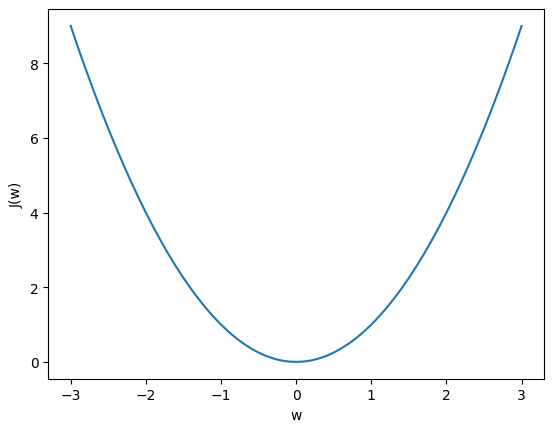

In [40]:
# Definim suportul functiei de cost
suport_fct = np.asarray([[-3.0, 3.0]])
# Alegem un numar de iteratii in care sa calculam functia de cost
n_iter = 50
# Alegem rata de invatare
# TODO incercati diferite valori pentru rata de invatare si urmariti comportamentul gradientului
learning_rate = 0.1

# Esantionam valori din intervalul suportului functiei cu pas de 0.1
f_input = np.arange(suport_fct[0,0], suport_fct[0,1]+0.1, 0.1)
# Calculam valorile functiei in punctele esantionate
f_output = J(f_input)
# Afisam forma functiei de cost
plt.plot(f_input, f_output)
plt.xlabel("w")
plt.ylabel("J(w)")
plt.show()

Pornim algoritmul de la valoarea 0.7759331272472472.
Iterația 1: w = 0.7604, J(w) = 0.5782
Iterația 2: w = 0.7452, J(w) = 0.5553
Iterația 3: w = 0.7303, J(w) = 0.5333
Iterația 4: w = 0.7157, J(w) = 0.5122
Iterația 5: w = 0.7014, J(w) = 0.4919
Iterația 6: w = 0.6874, J(w) = 0.4725
Iterația 7: w = 0.6736, J(w) = 0.4537
Iterația 8: w = 0.6601, J(w) = 0.4358
Iterația 9: w = 0.6469, J(w) = 0.4185
Iterația 10: w = 0.6340, J(w) = 0.4019
Iterația 11: w = 0.6213, J(w) = 0.3860
Iterația 12: w = 0.6089, J(w) = 0.3707
Iterația 13: w = 0.5967, J(w) = 0.3561
Iterația 14: w = 0.5848, J(w) = 0.3420
Iterația 15: w = 0.5731, J(w) = 0.3284
Iterația 16: w = 0.5616, J(w) = 0.3154
Iterația 17: w = 0.5504, J(w) = 0.3029
Iterația 18: w = 0.5394, J(w) = 0.2909
Iterația 19: w = 0.5286, J(w) = 0.2794
Iterația 20: w = 0.5180, J(w) = 0.2683
Iterația 21: w = 0.5077, J(w) = 0.2577
Iterația 22: w = 0.4975, J(w) = 0.2475
Iterația 23: w = 0.4876, J(w) = 0.2377
Iterația 24: w = 0.4778, J(w) = 0.2283
Iterația 25: w = 0.4

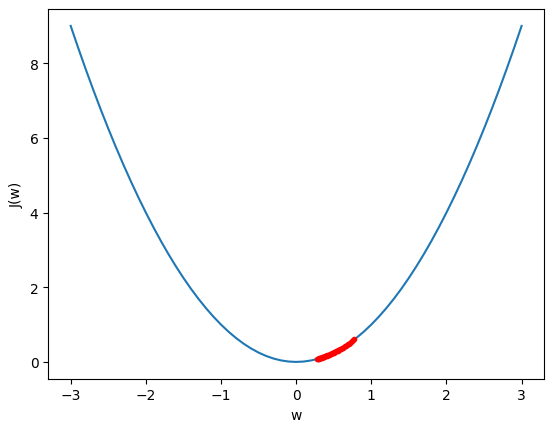

In [43]:
# Retinem toate valoriile w si J(w)
lista_w, lista_J_w = [], []
# Alegem un punct aleator de unde incepem algoritmul
w = np.random.uniform(suport_fct[0, 0], suport_fct[0, 1])
print ("Pornim algoritmul de la valoarea {}.".format(w))

# Retinem valorile initiale ale w si J(w)
lista_w.append(w)
lista_J_w.append(J(w))

for i in range(n_iter):
	# Calculam gradientul
	# TODO
	grad = dJ(w)
	# Actualizam w
	# TODO
	w = w- lr * grad
	# Calculam valoarea in noul punct w
	# TODO
	J_w = J(w)
	# Retinem noile valori ale w si J(w)
	# TODO
	lista_w.append(w)
	lista_J_w.append(J_w)
	# Afisam pe ecran noile valori w si J(w)
	# TODO
	print(f"Iterația {i+1}: w = {w:.4f}, J(w) = {J_w:.4f}")


# Afisam functia de cost initiala
plt.plot(f_input, f_output)
# Adaugam pe grafic valorile w si J(w) gasite
plt.plot(lista_w, lista_J_w, '.-', color='red')
plt.xlabel("w")
plt.ylabel("J(w)")
# Afisam graficul final
plt.show()

# Backpropagation
Să se implementeze algoritmul de propagare înapoi pentru o problemă de clasificare a datelor în 3 clase.
Exemplu adaptat de [aici](https://www.askpython.com/python/examples/backpropagation-in-python).

In [44]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [45]:
# Incarcam baza de date "Iris": https://archive.ics.uci.edu/ml/datasets/iris
data = load_iris()
# Extragem datele si etichetele din baza de date
X=data.data
y=data.target
# Impartim baza de date in train (80%) vs test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)

In [46]:
learning_rate = 0.1
iterations = 5000
N = y_train.size

# Dimensiunea intrarii
input_size = 4

# Dimensiunea stratului ascuns
hidden_size = 3

# Dimensiunea iesirii
output_size = 3

# Variabila in care vom stoca metricile
results = pd.DataFrame(columns=["mse", "accuracy"])

In [47]:
# Initializam seed-ul generatorului aleator
np.random.seed(10)

# Initializam ponderile dintre stratul de intrare si stratul ascuns
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))

# Initializam ponderile dintre stratul ascuns si stratul de iesire
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size))

In [48]:
# Definim functia sigmoid
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Definim functia MSE
def mean_squared_error(y_pred, y_true):
  return ((y_pred - y_true)**2).sum() / (y_pred.size * 2)

# Definim acuratetea
def accuracy(y_pred, y_true):
  acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
  return acc.mean()

# Definim functia one_hot
def one_hot(x):
  result = np.zeros((x.size, x.max()+1))
  result[np.arange(x.size), x] = 1
  return result

/tmp/ipython-input-252432291.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results=pd.concat([results, pd.DataFrame([{"mse": mse, "accuracy": acc}])], ignore_index=True)


Accuracy: 0.2


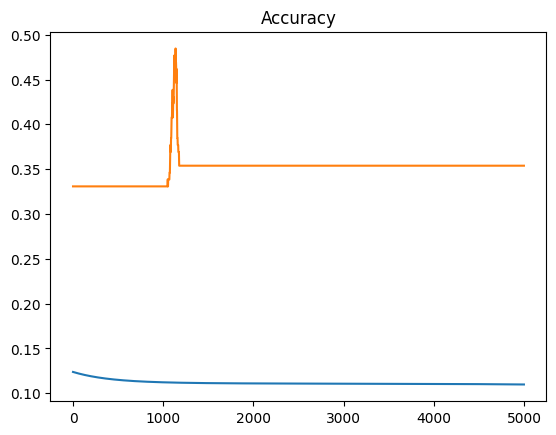

In [50]:
# Transformam etichetele in vectori one-hot
one_hot_y_train = one_hot(y_train)
one_hot_y_test = one_hot(y_test)

for itr in range(iterations):
  # Propagare inainte prin primul strat ascuns
  A1 = sigmoid(np.dot(X_train, W1))

  # Propagare inainte prin stratul de iesire
  A2 = sigmoid(np.dot(A1, W2))

  # Calculul erorii si al acuratetii
  mse = mean_squared_error(A2, one_hot_y_train)
  acc = accuracy(A2, one_hot_y_train)

  # Retinem mse si acc de la fiecare pas
  results=pd.concat([results, pd.DataFrame([{"mse": mse, "accuracy": acc}])], ignore_index=True)

  # Backpropagation
  # Calculam derivata pentru ponderile dintre ultimul strat si stratul ascuns
  E1 = A2 - one_hot_y_train
  dW1 = E1 * A2 * (1 - A2)

  # Calculam derivata pentru ponderile dintre stratul ascuns si stratul de intrare
  E2 = np.dot(dW1, W2.T)
  dW2 = E2 * A1 * (1 - A1)

  # Calculam gradientul - impartirea la N apare in urma derivarii functiei de cost
  W2_update = np.dot(A1.T, dW1) / N
  W1_update = np.dot(X_train.T, dW2) / N

  # Actualizam ponderile
  # TODO

  W2 -= lr * W2_update
  W1 -= lr * W1_update

# Afisam pe grafic MSE si accuracy
results.mse.plot(title="Mean Squared Error")
results.accuracy.plot(title="Accuracy")

# Rulam modelul antrenat pe baza de date de test
# TODO: rulati secventa de test prin rețeaua antrenată. Ieșirea rețelei va fi stocată în variabila A2 pentru a putea fi utilizată mai jos

A1 = sigmoid(np.dot(X_test, W1))
A2 = sigmoid(np.dot(A1, W2))

acc = accuracy(A2, one_hot_y_test)
print("Accuracy: {}".format(acc))